In [5]:
import pandas as pd
import numpy as np
from zwml.datasets import make_regression
from zwml.linear_models import linear_regression

In [6]:
mr = make_regression()
X,y = mr.build_dataset()

In [7]:
lr = linear_regression()

In [8]:
lr.fit(X, y)

In [9]:
lr.score(X, y)

-1.1401831554579134

In [10]:
preds = lr.predict(X)

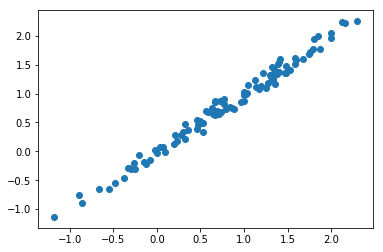

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(lr.predict(X),y);

In [12]:
new_X = mr.muck_up_data(X, add_nan=False)

In [13]:
from zwml.linear_models import sgd_regressor
sgd = sgd_regressor(regularize=None)

In [14]:
sgd.fit(new_X, y)

In [15]:
sgd.score(new_X,y)

-0.0084843458557672252

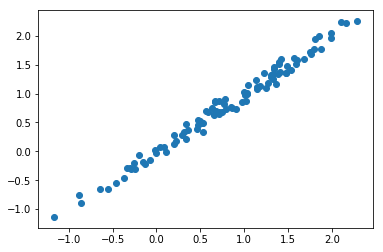

In [16]:
plt.scatter(sgd.predict(new_X),y);

In [17]:
from zwml.neighbors import kde_approximator
import numpy as np

X = np.hstack((np.random.normal(0,0.5,100), np.random.normal(5,1,100), np.random.normal(-5,2,50)))
X.shape

(250,)

In [22]:
kde = kde_approximator(bandwidth=1, grid_fineness=60)
kde.fit(X)
kde.make_surface()

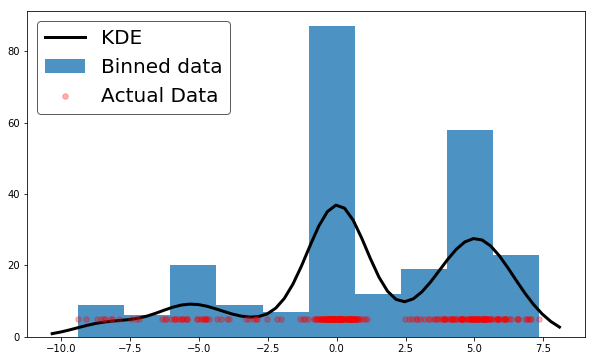

In [23]:
plt.figure(figsize=(10,6))

plt.hist(X, label="Binned data", alpha=0.8, zorder=1)
plt.plot(kde.region, kde.probs, c='k', lw=3, label="KDE", zorder=2);
plt.scatter(X, [5]*len(X), marker='o', c='r', s=30, alpha=0.3,label='Actual Data', zorder=3)
plt.legend(fontsize=20, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333');

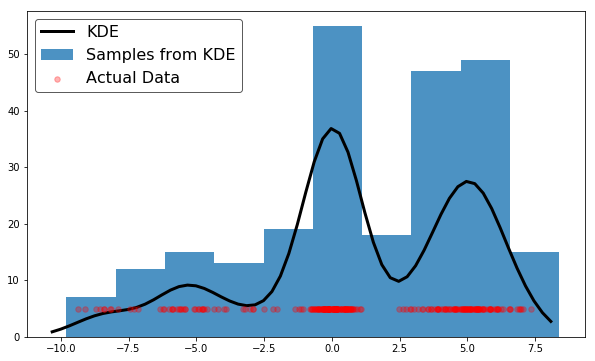

In [25]:
samp = kde.sample(num_samples=250, random_state=42)
plt.figure(figsize=(10,6))
plt.hist(samp, label="Samples from KDE", alpha=0.8, zorder=1)
plt.plot(kde.region, kde.probs, c='k', lw=3, label="KDE", zorder=2);
plt.scatter(X, [5]*len(X), marker='o', c='r', s=30, alpha=0.3,label='Actual Data', zorder=3)
plt.legend(fontsize=16, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333');